In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
sns.set_style("whitegrid")
# sns.set_theme()
matplotlib.rcParams['figure.figsize'] = [7, 4]

In [2]:
# names = ["MSCI World", "MSCI EM", "Gold", "Bond 1-3y"]
# tickers = ["EUNL.DE", "EUNM.DE", "8PSG.DE", "CBE3.L"]

tickers = [
     # iShares Core MSCI World USD (Acc)
    "EUNL.DE",

    # iShares MSCI EM
    "EUNM.DE",

    # Invesco Physical Gold ETC
    "SGLD.MI",

    # iShares € Govt Bond 1-3yr ETF EUR Acc
    "CSBGE3.MI",

    # Amundi Euro Government Bond 3-5Y UCITS ETF Acc
    "EM35.MI",

    # Xtrackers Eurozone Government Bond 5-7 UCITS ETF 1C
    "X57E.MI",

    # Amundi Euro Government Bond 7-10Y
    "EM710.MI",

    # Amundi Euro Government Bond 10-15Y
    "EM1015.MI",
]

## Caricamento dati

In [3]:
dfs = []
for t in tickers:
    df = pd.read_csv(f"../dati/{t}.csv", index_col="Date", parse_dates=True)
    dfs.append(df)

In [4]:
etfs = pd.concat(dfs, axis=1, sort=True)
etfs = etfs.dropna(how="any")
etfs

,EUNL.DE,EUNM.DE,SGLD.MI,CSBGE3.MI,EM35.MI,X57E.MI,EM710.MI,EM1015.MI
Date,,,,,,,,
2014-11-28,33.889999,23.730000,93.440002,110.790001,149.362305,223.880005,160.100006,191.929901
2014-12-01,33.500000,23.180000,94.550003,110.669998,149.249405,223.729996,159.990005,192.271194
2014-12-03,34.139999,23.540001,97.010002,110.949997,149.422501,223.949997,159.970001,192.294403
2014-12-04,33.700001,23.290001,95.730003,110.779999,149.305405,223.669998,159.720001,191.790604
2014-12-05,34.200001,23.480000,95.570000,110.699997,149.356598,223.850006,159.940002,192.313004
...,...,...,...,...,...,...,...,...
2025-07-25,102.945000,39.576000,273.329987,115.029999,151.199997,233.350006,168.130005,198.660004
2025-07-28,103.824997,39.852001,274.920013,115.110001,151.410004,233.850006,168.630005,199.419998
2025-07-29,104.254997,40.076000,277.649994,115.089996,151.419998,233.889999,168.500000,199.470001


In [5]:
etfs.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2575 entries, 2014-11-28 to 2025-07-31
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   EUNL.DE    2575 non-null   float64
 1   EUNM.DE    2575 non-null   float64
 2   SGLD.MI    2575 non-null   float64
 3   CSBGE3.MI  2575 non-null   float64
 4   EM35.MI    2575 non-null   float64
 5   X57E.MI    2575 non-null   float64
 6   EM710.MI   2575 non-null   float64
 7   EM1015.MI  2575 non-null   float64
dtypes: float64(8)
memory usage: 181.1 KB


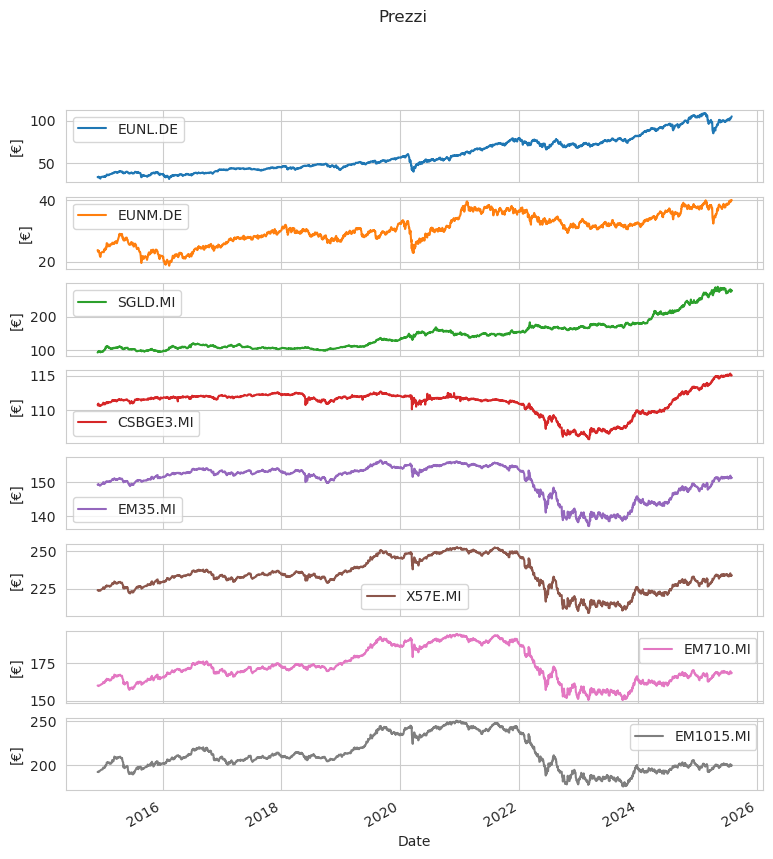

In [6]:
etfs.plot(title="Prezzi", ylabel="[€]", subplots=True, figsize=(9.0, 10));

## Parametri

In [129]:
anni = 5

## Portafogli

In [130]:
def get_ptf(df, anni, pesi):
    ptf = (df.shift(-anni*253) / df) - 1
    ptf = ptf.dropna(how="any")
    ptf["RTOT"] = (ptf * pesi).sum(axis=1)
    return ptf

def ptf_stats(ptf):
    d = ptf.describe()
    d.loc["VaR", :] = ptf.quantile(0.05)
    d.loc["CVaR", :] = ptf[ptf <= d.loc["VaR", :]].mean()
    d.loc["sharpe", :] = d.loc["mean"] / d.loc["std"]
    return d

### Portafogli benchmark

In [131]:
ptfs = pd.DataFrame()
n = etfs.shape[1]
ws = np.eye(n)
for (i, c) in enumerate(etfs.columns):
    w = ws[i, :]
    ptfs[f"RTOT_{c}"] = get_ptf(etfs, anni, w).RTOT

In [132]:
ptf_stats(ptfs)

,RTOT_EUNL.DE,RTOT_EUNM.DE,RTOT_SGLD.MI,RTOT_CSBGE3.MI,RTOT_EM35.MI,RTOT_X57E.MI,RTOT_EM710.MI,RTOT_EM1015.MI
count,1310.000000,1310.000000,1310.000000,1310.000000,1310.000000,1310.000000,1310.000000,1310.000000
mean,0.742956,0.288206,0.592435,-0.013299,-0.031361,-0.015591,-0.011846,-0.014990
std,0.172671,0.212183,0.172154,0.022687,0.041634,0.072997,0.113212,0.151443
min,0.322881,-0.004159,0.211896,-0.058064,-0.101957,-0.106244,-0.142038,-0.191374
25%,0.611399,0.136089,0.472459,-0.030753,-0.067239,-0.076559,-0.104545,-0.139573
50%,0.763501,0.218539,0.588009,-0.008132,-0.038979,-0.053775,-0.083283,-0.100299
75%,0.860366,0.407018,0.713677,0.002764,0.008075,0.060112,0.104010,0.139534
max,1.407843,0.981374,0.981513,0.037545,0.045506,0.132835,0.228533,0.316706
VaR,0.464459,0.040978,0.331860,-0.050736,-0.087758,-0.092176,-0.126553,-0.177748
CVaR,0.405522,0.026051,0.271404,-0.052913,-0.092432,-0.096801,-0.132058,-0.182052


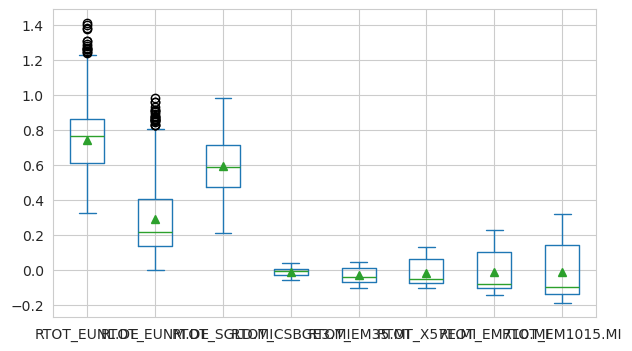

In [133]:
ptfs.plot(kind="box", showmeans=True);

## Random sampling

### Pesi randomici

In [134]:
# n_samples = 5000000
# n = etfs.shape[1]
# w = np.random.rand(n_samples, n - 1)
# w_df = pd.DataFrame(w)
# w_df = w_df[w_df.sum(axis=1) <= 1]
# w_df[f"{n - 1}"] = 1 - w_df.sum(axis=1)
# w = w_df.to_numpy()
# w = np.concatenate((w, np.eye(n)))
# w.shape

In [135]:
# n_samples = 10000

# w = np.random.rand(n_samples, n)
# w = w / w.sum(axis=1).reshape((-1, 1))

In [136]:
n_samples = 1000
n = etfs.shape[1]
w = np.random.dirichlet(alpha=[1] * n, size=(n_samples, ))
w.shape

(1000, 8)

In [137]:
# sns.pairplot(pd.DataFrame(w), corner=True);

### Creazioni portafogli

In [138]:
ptf_rnd0 = get_ptf(etfs, anni, w[0, :])
ptf_rnd = ptf_rnd0.RTOT.to_numpy()
ptf_rnd = np.repeat(ptf_rnd.reshape((-1, 1)), w.shape[0], axis=1)

for i in range(1, w.shape[0]):
    p = get_ptf(etfs, anni, w[i, :]).RTOT.to_numpy()
    ptf_rnd[:, i] = p

ptf_rnd = pd.DataFrame(ptf_rnd, index=ptf_rnd0.index)
ptf_rnd.head()

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
Date,,,,,,,,,,,,,,,,,,,,,
2014-11-28,0.350032,0.360374,0.270229,0.242277,0.346622,0.218132,0.312104,0.390402,0.335985,0.204864,...,0.089944,0.430765,0.285037,0.269827,0.118643,0.343829,0.218500,0.166196,0.375513,0.286055
2014-12-01,0.343067,0.354925,0.258546,0.236276,0.342733,0.213819,0.305902,0.392111,0.326636,0.197524,...,0.091724,0.414902,0.271919,0.264327,0.117560,0.331693,0.217457,0.162901,0.358268,0.279157
2014-12-03,0.330115,0.339517,0.247703,0.228408,0.326849,0.209300,0.294615,0.374143,0.311779,0.192355,...,0.087972,0.395438,0.261437,0.255899,0.115450,0.318770,0.209632,0.157942,0.342117,0.272723
2014-12-04,0.335060,0.344603,0.245574,0.230391,0.332139,0.212082,0.298545,0.380301,0.315480,0.194864,...,0.089518,0.400987,0.262729,0.257610,0.117165,0.323275,0.210534,0.158112,0.343375,0.276308
2014-12-05,0.343734,0.353633,0.261106,0.239783,0.340774,0.219216,0.307651,0.386642,0.327380,0.202716,...,0.095327,0.415843,0.276227,0.266654,0.123117,0.334417,0.219161,0.165416,0.360243,0.284539


### Rendimento atteso vs deviazione standard

In [139]:
stats = ptf_stats(ptf_rnd)

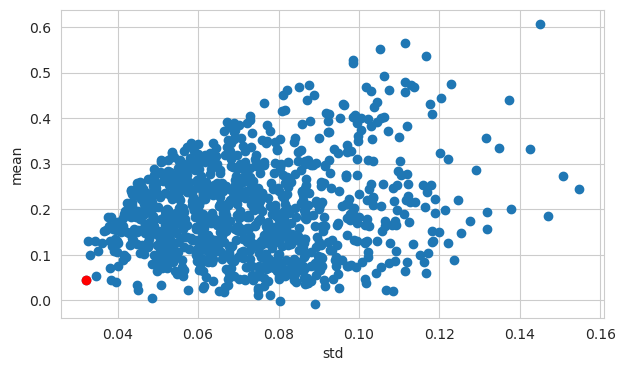

In [140]:
idxmin = stats.loc["std", :].idxmin()

x = stats.loc["std", :]
y = stats.loc["mean", :]
t = stats.columns.to_numpy()
plt.figure()
plt.scatter(x, y)
plt.scatter(x[idxmin], y[idxmin], c='r')
# for (xi, yi, ti) in zip(x, y, t):
#     plt.text(xi, yi, ti, va="bottom", ha="center")
plt.xlabel("std")
plt.ylabel("mean")
plt.show()

[0.01074376 0.03019604 0.06963284 0.64276134 0.02568695 0.11204486
 0.08629551 0.02263869]


<BarContainer object of 8 artists>

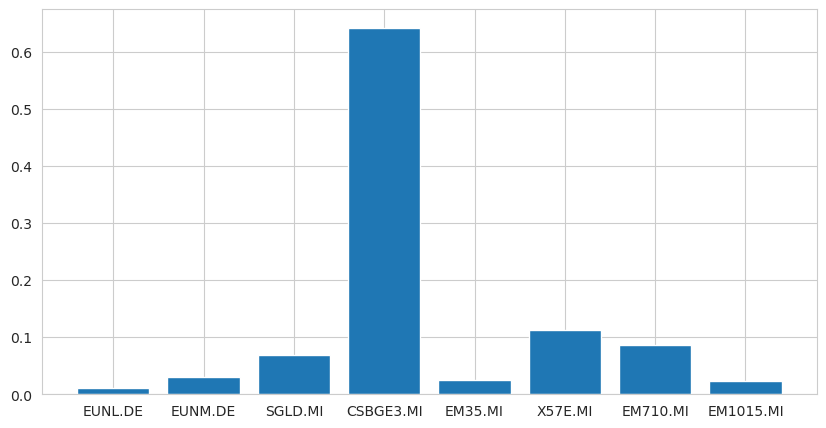

In [141]:
print(w[idxmin, :])
plt.figure(figsize=(10, 5))
plt.bar(etfs.columns, w[idxmin, :])

In [142]:
stats[idxmin]

count     1310.000000
mean         0.045476
std          0.032152
min         -0.019111
25%          0.019769
50%          0.050590
75%          0.073582
max          0.107145
VaR         -0.007786
CVaR        -0.012657
sharpe       1.414393
Name: 248, dtype: float64

### Rendimento atteso vs Sharpe ratio

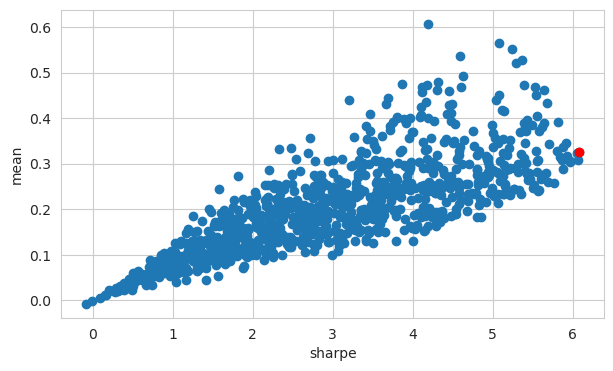

In [143]:
idxmax = stats.loc["sharpe", :].idxmax()

x = stats.loc["sharpe", :]
y = stats.loc["mean", :]
t = stats.columns.to_numpy()
plt.figure()
plt.scatter(x, y)
plt.scatter(x[idxmax], y[idxmax], c='r')
# for (xi, yi, ti) in zip(x, y, t):
#     plt.text(xi, yi, ti, va="bottom", ha="center")
plt.xlabel("sharpe")
plt.ylabel("mean")
plt.show()

[0.12195546 0.00854634 0.40452348 0.00791443 0.04183599 0.20183924
 0.08115868 0.13222638]


<BarContainer object of 8 artists>

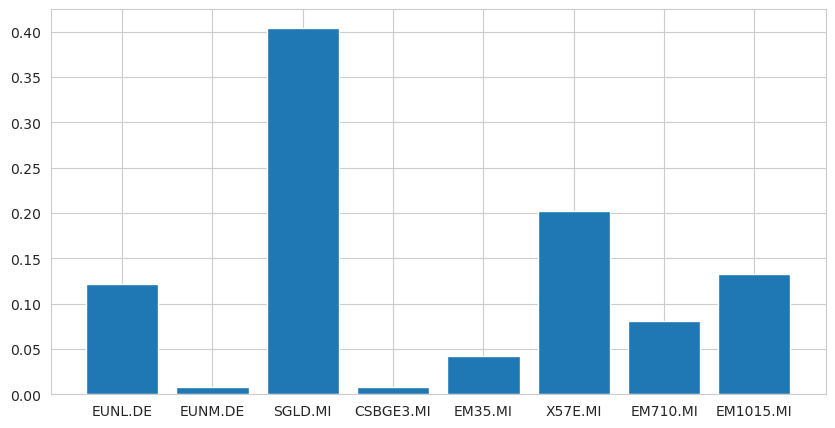

In [144]:
print(w[idxmax, :])
plt.figure(figsize=(10, 5))
plt.bar(etfs.columns, w[idxmax, :])

In [145]:
stats[idxmax]

count     1310.000000
mean         0.325217
std          0.053460
min          0.218531
25%          0.290179
50%          0.316838
75%          0.353480
max          0.527493
VaR          0.247117
CVaR         0.237800
sharpe       6.083368
Name: 79, dtype: float64

### Rendimento atteso vs CVaR

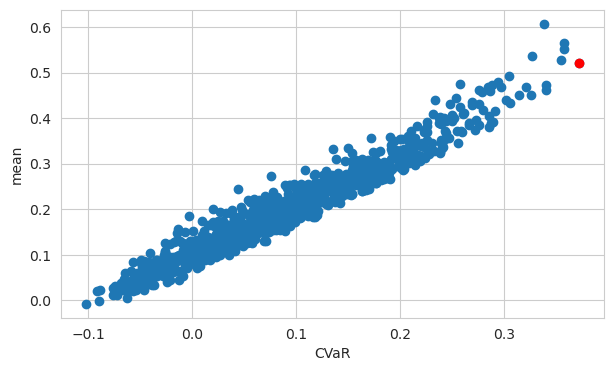

In [146]:
idxmax = stats.loc["CVaR", :].idxmax()

x = stats.loc["CVaR", :]
y = stats.loc["mean", :]
t = stats.columns.to_numpy()
plt.figure()
plt.scatter(x, y)
plt.scatter(x[idxmax], y[idxmax], c='r')
# for (xi, yi, ti) in zip(x, y, t):
#     plt.text(xi, yi, ti, va="bottom", ha="center")
plt.xlabel("CVaR")
plt.ylabel("mean")
plt.show()

[0.25858737 0.01833249 0.55078797 0.01952609 0.03649421 0.0021002
 0.06156155 0.05261011]


<BarContainer object of 8 artists>

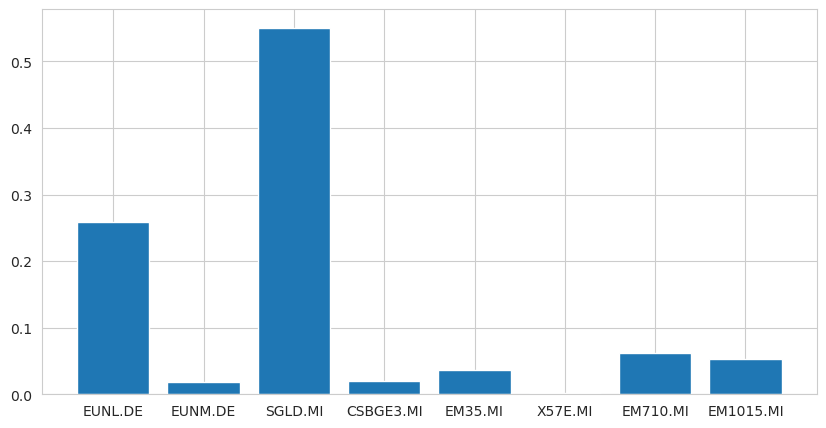

In [147]:
print(w[idxmax, :])
plt.figure(figsize=(10, 5))
plt.bar(etfs.columns, w[idxmax, :])

In [148]:
stats[idxmax]

count     1310.000000
mean         0.520754
std          0.098508
min          0.317676
25%          0.453149
50%          0.494696
75%          0.577469
max          0.892258
VaR          0.391828
CVaR         0.372030
sharpe       5.286410
Name: 70, dtype: float64

In [149]:
# x = stats.loc["CVaR", :]
# y = stats.loc["mean", :]
# c = w[:, 2]  # percentuale di oro
# t = stats.columns.to_numpy()
# plt.figure(figsize=(9, 12))

# plt.subplot(4, 1, 1)
# c = w[:, 0]  # percentuale di World
# plt.scatter(x, y, c=c, cmap="cividis")

# plt.xlabel("CVaR")
# plt.ylabel("mean")
# plt.colorbar(label="Perc. MSCI World")

# plt.subplot(4, 1, 2)
# c = w[:, 1]  # percentuale di EM
# plt.scatter(x, y, c=c, cmap="viridis")

# plt.xlabel("CVaR")
# plt.ylabel("mean")
# plt.colorbar(label="Perc. MSCI EM")

# plt.subplot(4, 1, 3)
# c = w[:, 3]  # percentuale di oro
# plt.scatter(x, y, c=c, cmap="plasma")

# plt.xlabel("CVaR")
# plt.ylabel("mean")
# plt.colorbar(label="Perc. oro")

# plt.subplot(4, 1, 4)
# c = w[:, 3]  # percentuale di bond
# plt.scatter(x, y, c=c)

# plt.xlabel("CVaR")
# plt.ylabel("mean")
# plt.colorbar(label="Perc. Bond 1-3y")


# plt.show()

## Ottimizzazione

In [150]:
from scipy.optimize import minimize, LinearConstraint

In [252]:
optFn = lambda w: -ptf_stats(get_ptf(etfs, anni, w)[["RTOT"]]).loc["CVaR", "RTOT"]
x0 = w[idxmax, :]
x0 = w[idxmin, :]
x0 = [0] * n
x0 = np.random.dirichlet(alpha=[1] * n)
constraints = (
    LinearConstraint([1] * n, lb=1.0, ub=1.0),
)
bounds = [(0, 1)] * n
opts = {"disp": True}
sol = minimize(optFn, x0, bounds=bounds, constraints=constraints, 
    options=opts)

Optimization terminated successfully    (Exit mode 0)
            Current function value: -0.43764687045684414
            Iterations: 5
            Function evaluations: 46
            Gradient evaluations: 5


In [253]:
sol

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: -0.43764687045684414
       x: [ 3.917e-01  3.221e-17  6.083e-01  0.000e+00  0.000e+00
            1.650e-16  0.000e+00  0.000e+00]
     nit: 5
     jac: [-4.371e-01 -1.811e-01 -4.380e-01 -3.688e-03 -3.029e-02
           -9.644e-02 -1.607e-01 -2.013e-01]
    nfev: 46
    njev: 5

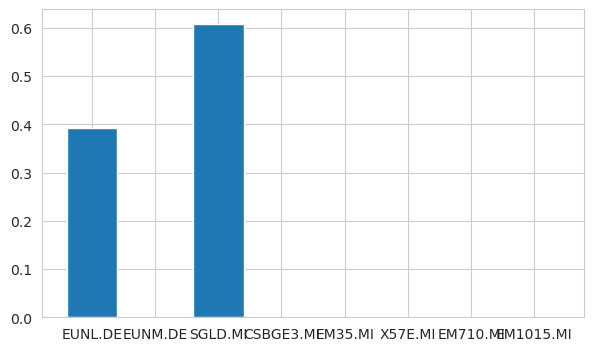

In [254]:
plt.figure()
plt.bar(etfs.columns, sol.x);

In [255]:
pftOpt = get_ptf(etfs, anni, sol.x)
ptf_stats(pftOpt).RTOT

count     1310.000000
mean         0.651398
std          0.131076
min          0.363083
25%          0.559287
50%          0.620925
75%          0.737965
max          1.137709
VaR          0.472430
CVaR         0.437647
sharpe       4.969614
Name: RTOT, dtype: float64

<Axes: xlabel='Date'>

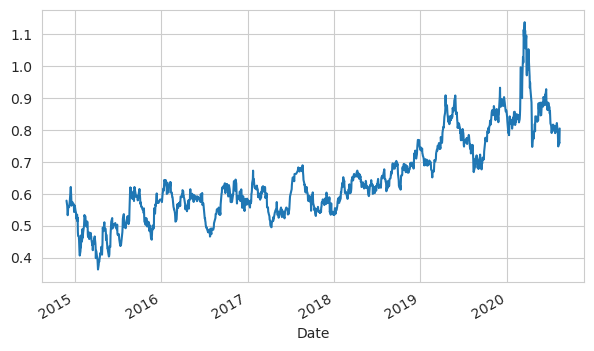

In [256]:
pftOpt.RTOT.plot()

In [257]:
ptfs["RTOT_Optim"] = pftOpt.RTOT


In [264]:
w_mine = [0.70, 0.15, 0.15, 0, 0, 0, 0, 0]
ptfs["RTOT_mine"] = get_ptf(etfs, anni, w_mine).RTOT

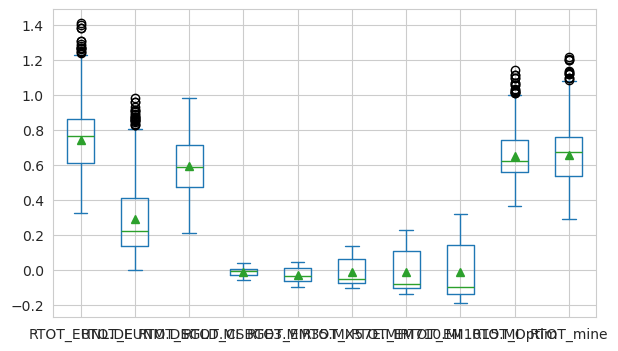

In [265]:
ptfs.plot(kind="box", showmeans=True);

In [266]:
ptf_stats(ptfs)

,RTOT_EUNL.DE,RTOT_EUNM.DE,RTOT_SGLD.MI,RTOT_CSBGE3.MI,RTOT_EM35.MI,RTOT_X57E.MI,RTOT_EM710.MI,RTOT_EM1015.MI,RTOT_Optim,RTOT_mine
count,1310.000000,1310.000000,1310.000000,1310.000000,1310.000000,1310.000000,1310.000000,1310.000000,1310.000000,1310.000000
mean,0.742956,0.288206,0.592435,-0.013299,-0.031361,-0.015591,-0.011846,-0.014990,0.651398,0.652165
std,0.172671,0.212183,0.172154,0.022687,0.041634,0.072997,0.113212,0.151443,0.131076,0.143368
min,0.322881,-0.004159,0.211896,-0.058064,-0.101957,-0.106244,-0.142038,-0.191374,0.363083,0.288306
25%,0.611399,0.136089,0.472459,-0.030753,-0.067239,-0.076559,-0.104545,-0.139573,0.559287,0.536669
50%,0.763501,0.218539,0.588009,-0.008132,-0.038979,-0.053775,-0.083283,-0.100299,0.620925,0.669114
75%,0.860366,0.407018,0.713677,0.002764,0.008075,0.060112,0.104010,0.139534,0.737965,0.755028
max,1.407843,0.981374,0.981513,0.037545,0.045506,0.132835,0.228533,0.316706,1.137709,1.214688
VaR,0.464459,0.040978,0.331860,-0.050736,-0.087758,-0.092176,-0.126553,-0.177748,0.472430,0.429918
CVaR,0.405522,0.026051,0.271404,-0.052913,-0.092432,-0.096801,-0.132058,-0.182052,0.437647,0.376904
